# Machine learning learning for preparing Interview coding

In [27]:
# Housing Pricing dataset

# Importing necessary libraries
from sklearn.datasets import load_boston  # Import the Boston housing dataset
import numpy as np  # NumPy for numerical operations
import pandas as pd  # Pandas for data manipulation
import seaborn as sns  # Seaborn for data visualization
import matplotlib.pyplot as plt  # Matplotlib for plotting
%matplotlib inline  # This enables inline plotting within Jupyter notebooks

UsageError: unrecognized arguments: # This enables inline plotting within Jupyter notebooks


In [ ]:
# Loading the Boston housing dataset
df = load_boston()

# Converting the dataset into a pandas DataFrame
dataset = pd.DataFrame(df.data)
dataset.columns = df.feature_names  # Assigning feature names to the columns (independent features)
dataset["price"] = df.target  # Adding a new column for the target variable (dependent feature)

# Dividing the dataset into independent (X) and dependent (y) features
X = dataset.iloc[:, :-1]  # All columns except the last one as independent features
y = dataset.iloc[:, -1]  # The last column as the dependent feature (price)

# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split  # Importing train_test_split for splitting data

# Performing the train-test split
# 'test_size=0.33' means 33% of the data will be used for testing, and 67% for training
# 'random_state=42' ensures the split is reproducible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Linear Regression

In [41]:
# Linear Regression

# Importing Linear Regression model and cross-validation method
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Initializing the Linear Regression model
LR = LinearRegression()

# Performing cross-validation to evaluate the model
# The scoring metric used here is negative mean squared error
mse = cross_val_score(LR, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

# Calculating the mean of the mean squared errors from cross-validation
mean_mse = np.mean(mse)

# Printing the mean MSE to understand the model's average performance
print("Mean MSE from cross-validation:", mean_mse)


Mean MSE from cross-validation: -25.187874739284997


# Ridge Regression

In [42]:
# Overcome overfitting

# Ridge Regression (a type of regularization technique to prevent overfitting)
from sklearn.linear_model import Ridge  # Importing the Ridge Regression model
from sklearn.model_selection import GridSearchCV  # Importing GridSearchCV for hyperparameter tuning

# Initializing the Ridge regressor
ridge = Ridge()

# Defining a range of values for the 'alpha' hyperparameter (regularization strength)
params = {'alpha': [1e-15, 1e-10, 1e-3, 1e-2, 1, 2, 5, 10, 20]}

# Setting up GridSearchCV to find the best 'alpha' value through cross-validation
# 'scoring' is set to 'neg_mean_squared_error' to minimize the mean squared error
ridge_regressor = GridSearchCV(ridge, params, scoring='neg_mean_squared_error', cv=5)

# Fitting the model to the data (X, y)
ridge_regressor.fit(X_train, y_train)

# Printing the best parameters found by GridSearchCV
print("Best parameters found by GridSearchCV:", ridge_regressor.best_params_)

# Printing the best score achieved during the grid search
print("Best score achieved during GridSearchCV:", ridge_regressor.best_score_)


Best parameters found by GridSearchCV: {'alpha': 0.01}
Best score achieved during GridSearchCV: -25.186899367386957


In [43]:
# Predicting the target values for the test set using the best model found by GridSearchCV
y_pred = ridge_regressor.predict(X_test)

# Evaluating the model's performance on the test set
from sklearn.metrics import mean_squared_error, r2_score

# Calculating the Mean Squared Error (MSE) on the test set
mse_test = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse_test)

# Calculating the R-squared score on the test set
r2_test = r2_score(y_test, y_pred)
print("R-squared Score on Test Set:", r2_test)


Mean Squared Error on Test Set: 20.72850685436875
R-squared Score on Test Set: 0.7260978407192356


# Lasso Regression

In [44]:
# Overcome overfitting

# Lasso Regression (another type of regularization technique to prevent overfitting)
from sklearn.linear_model import Lasso  # Importing the Lasso Regression model
from sklearn.model_selection import GridSearchCV  # Importing GridSearchCV for hyperparameter tuning

# Initializing the Lasso regressor
lasso = Lasso()

# Defining a range of values for the 'alpha' hyperparameter (regularization strength)
params = {'alpha': [1e-15, 1e-10, 1e-3, 1e-2, 1, 2, 5, 10, 20]}

# Setting up GridSearchCV to find the best 'alpha' value through cross-validation
# 'scoring' is set to 'neg_mean_squared_error' to minimize the mean squared error
lasso_regressor = GridSearchCV(lasso, params, scoring='neg_mean_squared_error', cv=5)

# Fitting the model to the data (X, y)
lasso_regressor.fit(X_train,y_train)

# Printing the best parameters found by GridSearchCV
print("Best parameters found by GridSearchCV:", lasso_regressor.best_params_)

# Printing the best score achieved during the grid search
print("Best score achieved during GridSearchCV:", lasso_regressor.best_score_)


Best parameters found by GridSearchCV: {'alpha': 1e-15}
Best score achieved during GridSearchCV: -25.18787473928503


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2729.474842982295, tolerance: 2.2835709077490773
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2557.9233764313353, tolerance: 2.4934183837638373
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2941.918945045478, tolerance: 2.1595952398523983
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective

In [45]:
# Predicting the target values for the test set using the best model found by GridSearchCV
y_pred = lasso_regressor.predict(X_test)

# Evaluating the model's performance on the test set
from sklearn.metrics import mean_squared_error, r2_score

# Calculating the Mean Squared Error (MSE) on the test set
mse_test = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse_test)

# Calculating the R-squared score on the test set
r2_test = r2_score(y_test, y_pred)
print("R-squared Score on Test Set:", r2_test)


Mean Squared Error on Test Set: 20.72402343733982
R-squared Score on Test Set: 0.7261570836552468


# Logistic Regression

In [50]:
# Importing necessary libraries
from sklearn.linear_model import LogisticRegression  # Importing Logistic Regression model
from sklearn.datasets import load_breast_cancer  
import pandas as pd  # Importing pandas for data manipulation

# Loading the breast cancer dataset
df = load_breast_cancer()

# Independent features
X = pd.DataFrame(df['data'], columns=df['feature_names'])  

# Dependent feature
y = pd.DataFrame(df['target'], columns=['Target'])  
# Check balance of the target variable
y['Target'].value_counts()

1    357
0    212
Name: Target, dtype: int64

In [57]:
# Performing the train-test split
from sklearn.model_selection import train_test_split  # Ensure train_test_split is imported
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Corrected parameters for GridSearchCV
params = {'C': [1, 5, 10], 'max_iter': [100, 150]}

# Initializing the Logistic Regression model with initial parameters
from sklearn.linear_model import LogisticRegression  # Import LogisticRegression
log_reg = LogisticRegression(solver='liblinear')

# Setting up GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV  # Import GridSearchCV
model = GridSearchCV(log_reg, param_grid=params, scoring='f1', cv=5)

# Fitting the model to the training data
model.fit(X_train, y_train)



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/loc

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [1, 5, 10], 'max_iter': [100, 150]},
             scoring='f1')

In [58]:
model.best_params_

{'C': 5, 'max_iter': 100}

In [59]:
model.best_score_

0.9621404151182645

In [60]:
y_pred=model.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1])

In [63]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Assuming y_pred is your predicted labels from the model on the test set
y_pred = model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy Score:", accuracy)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[ 64   3]
 [  4 117]]

Accuracy Score: 0.9627659574468085

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        67
           1       0.97      0.97      0.97       121

    accuracy                           0.96       188
   macro avg       0.96      0.96      0.96       188
weighted avg       0.96      0.96      0.96       188



# Naive Baye's

Accuracy: 0.98


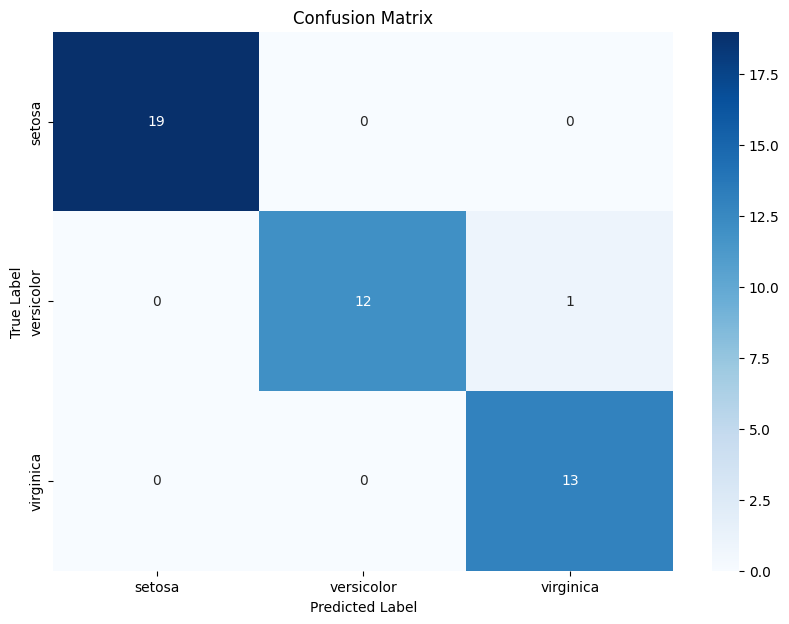

In [73]:
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
classifier = GaussianNB()

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Plot the confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Decision Tree

[Text(581.25, 705.8333333333334, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(491.82692307692304, 577.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(670.6730769230769, 577.5, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(357.6923076923077, 449.16666666666663, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(178.84615384615384, 320.8333333333333, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(89.42307692307692, 192.5, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(268.2692307692308, 192.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(536.5384615384615, 320.8333333333333, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(447.1153846153846, 192.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(625.9615384615385, 192.5, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(536.5384615384615, 64.16666666666663, 'gini = 0.0\nsa

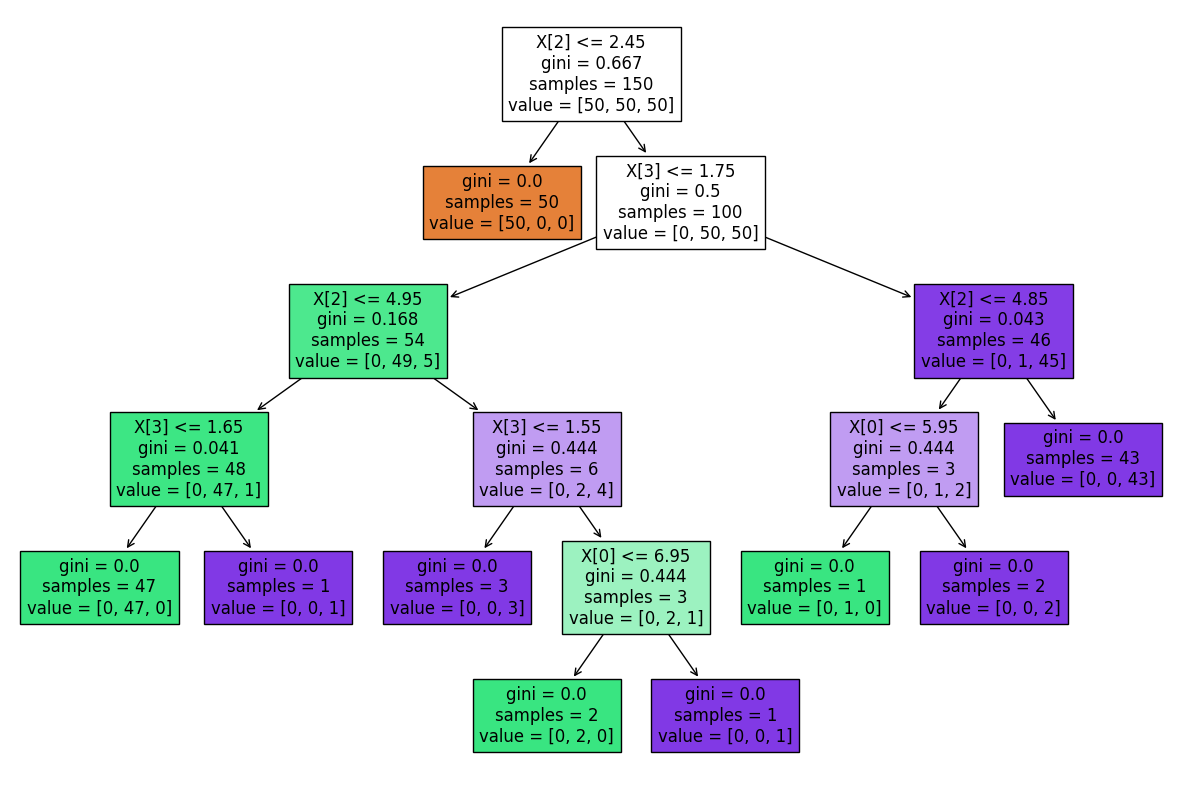

In [72]:
from sklearn.datasets import load_iris  # Import the Iris dataset from scikit-learn
from sklearn.tree import DecisionTreeClassifier  # Import the Decision Tree Classifier
from sklearn import tree  # Import tree module for plotting

# Load the Iris dataset
iris = load_iris()

# Initialize the Decision Tree Classifier
classifier = DecisionTreeClassifier()

# Train the classifier on the Iris dataset
classifier.fit(iris.data, iris.target)

# Set the size of the plot
plt.figure(figsize=(15, 10))

# Plot the decision tree and fill the nodes with colors
tree.plot_tree(classifier, filled=True)


# Random Forest

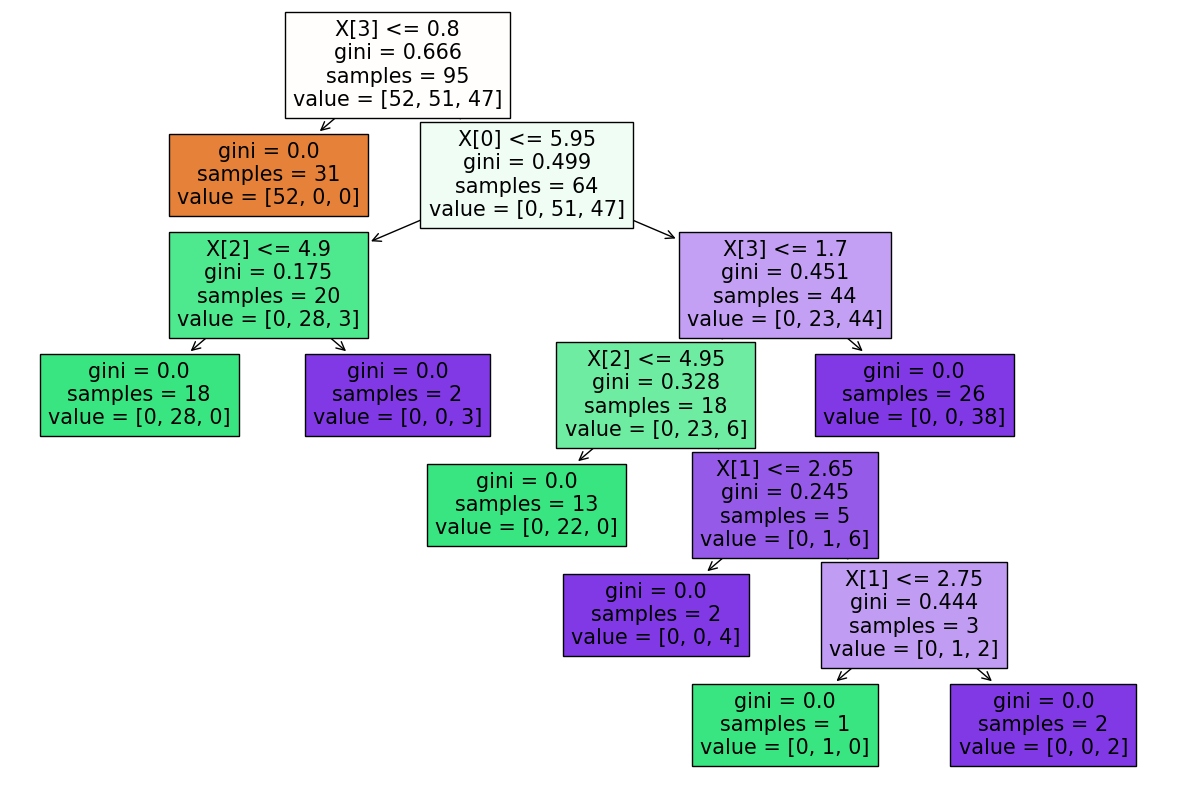

In [76]:
from sklearn.datasets import load_iris  # Import the Iris dataset from scikit-learn
from sklearn.ensemble import RandomForestClassifier  # Import the Random Forest Classifier
from sklearn import tree  # Import tree module for plotting
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Load the Iris dataset
iris = load_iris()

# Initialize the Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=10)  # Using 10 trees in the forest

# Train the classifier on the Iris dataset
classifier.fit(iris.data, iris.target)

# Plotting one of the trees in the forest
plt.figure(figsize=(15, 10))

# Plot the first decision tree in the forest and fill the nodes with colors
tree.plot_tree(classifier.estimators_[0], filled=True)

# Show the plot
plt.show()


## AdaBoost Basics:

**AdaBoost** works by combining multiple "weak" learners (simple models, like shallow decision trees) into a strong classifier.
It sequentially builds models, focusing on examples that previous models misclassified.

### Base Estimator:
We're using a simple decision tree with a maximum depth of 1 (`max_depth=1`). This means each tree is just a decision stump (a single-level decision tree).

### AdaBoostClassifier:
The `n_estimators=50` parameter tells AdaBoost to create 50 such decision stumps, each one focusing more on the data points that were harder to classify in the previous steps.


Model accuracy: 100.00%


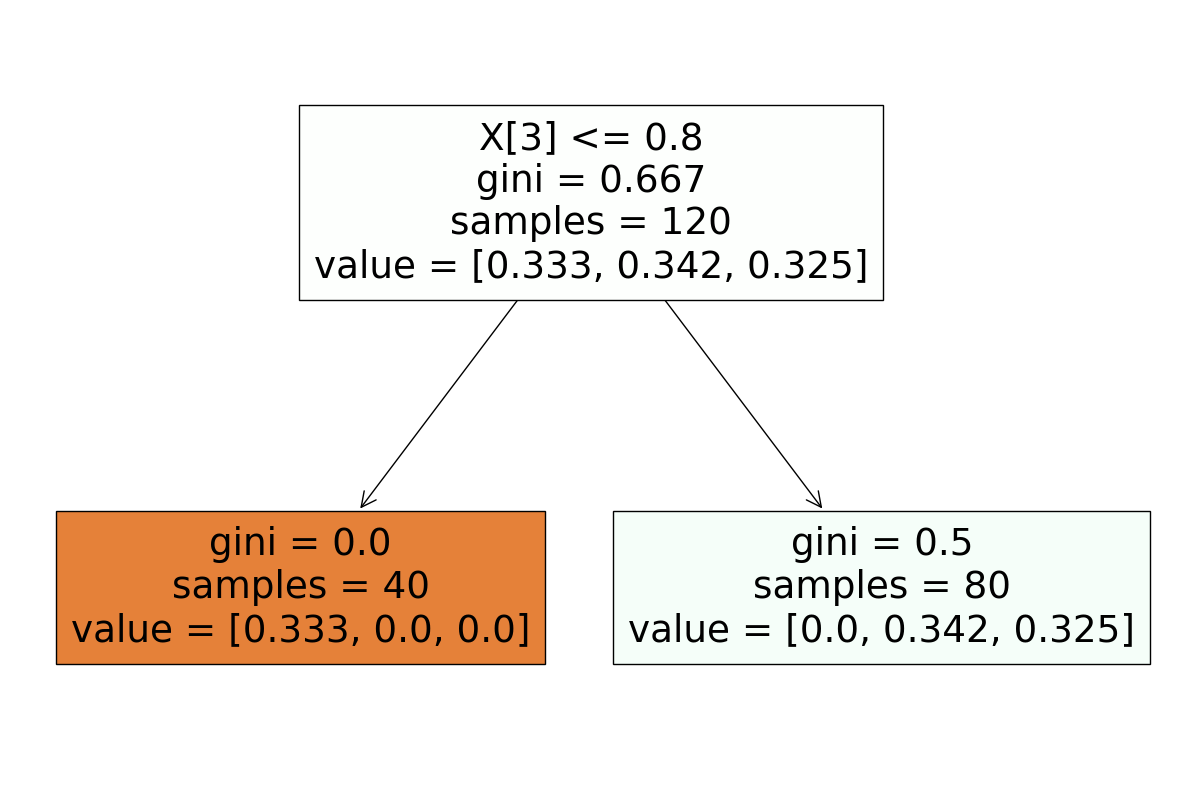

In [78]:
from sklearn.datasets import load_iris  # Load the Iris dataset from scikit-learn
from sklearn.ensemble import AdaBoostClassifier  # Import the AdaBoost Classifier
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier to use as a base estimator
import matplotlib.pyplot as plt  # Import matplotlib for plotting
from sklearn.model_selection import train_test_split  # Import function to split the dataset into training and testing sets
from sklearn.metrics import accuracy_score  # Import function to calculate the accuracy of the model

# Load the Iris dataset
iris = load_iris()

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier as the base estimator for AdaBoost
base_estimator = DecisionTreeClassifier(max_depth=1)  # Use a simple decision tree with max depth of 1

# Initialize the AdaBoost Classifier with the base estimator
classifier = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)

# Train the classifier on the training data
classifier.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy * 100:.2f}%")

# Plot the decision tree of the first estimator in the AdaBoost ensemble
plt.figure(figsize=(15, 10))
plt.title("First Decision Tree in AdaBoost Ensemble")
tree.plot_tree(classifier.estimators_[0], filled=True)
plt.show()



# XGBoost

# Understanding XGBoost

## What is XGBoost?

**XGBoost** (eXtreme Gradient Boosting) is a powerful machine learning algorithm that builds multiple decision trees sequentially. Each tree tries to correct the mistakes made by the previous ones, making the model more accurate over time. XGBoost is widely used for tasks like classification and regression.

## How XGBoost Works:

1. **Boosting Technique:** XGBoost combines the outputs of many weak models (typically decision trees) to create a strong model. Each model focuses on improving where the previous ones fell short.

2. **Sequential Learning:** The model is built in stages, with each new tree learning from the errors of the previous trees. This step-by-step improvement helps the model make better predictions.

3. **Example - Predicting House Prices:**
   - Imagine you want to predict house prices based on features like size, location, and number of bedrooms.
   - Initially, the first decision tree might predict prices but with some errors.
   - The next tree is built to correct those errors, learning from where the first tree went wrong.
   - This process continues, with each tree making the overall prediction more accurate.

4. **Gradient Descent:** XGBoost uses a technique called gradient descent to minimize the difference between the predicted values and the actual values, refining the model’s accuracy.

5. **Regularization:** XGBoost includes methods to prevent overfitting, ensuring that the model generalizes well to new data, not just the training data.

6. **Scalability:** XGBoost is highly efficient and can handle large datasets quickly, making it ideal for real-world applications.

## Why Use XGBoost?

- **High Performance:** It produces accurate results quickly, even with large datasets.
- **Flexibility:** Suitable for various tasks, including predicting outcomes (classification) or continuous values (regression).
- **Real-World Example:** XGBoost could be used to predict whether a customer will buy a product based on their browsing history, purchase history, and demographic information.

In summary, XGBoost is a versatile and robust tool that excels at improving predictions through its boosting technique and scalability, making it a go-to algorithm for many machine learning tasks.


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
import numpy as np

# Load the breast cancer dataset
data = load_breast_cancer()  # Load the dataset from sklearn
X = pd.DataFrame(data.data, columns=data.feature_names)  # Convert features to a DataFrame
y = pd.Series(data.target)  # Convert target variable to a Series

# Define the XGBoost model (using GradientBoostingClassifier as a proxy for XGBoost)
xgb_model = GradientBoostingClassifier()  # Initialize the model

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],         # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],       # Learning rate for each boosting step
    'max_depth': [3, 4, 5],                  # Maximum depth of the individual estimators
    'subsample': [0.8, 1.0],                 # Subsample ratio of the training data
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]            # Minimum number of samples required to be at a leaf node
}

# Initialize KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=0)  # 5-fold cross-validation

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=kf, scoring='accuracy')
grid_search.fit(X, y)  # Fit the model with the data

# Get the best parameters and best cross-validation score
best_params = grid_search.best_params_  # Best parameters from the grid search
best_score = grid_search.best_score_    # Best accuracy score from cross-validation

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

# Train the final model using the best parameters
best_model = grid_search.best_estimator_  # Best model from grid search
best_model.fit(X, y)  # Fit the final model with the entire dataset

# Evaluate the model using cross-validation
cv_scores = cross_val_score(best_model, X, y, cv=kf, scoring='accuracy')  # Cross-validation scores
print(f"Cross-Validation Scores: {cv_scores}")  # Print individual cross-validation scores
print(f"Mean Cross-Validation Accuracy: {np.mean(cv_scores):.4f}")  # Print mean accuracy



# SVM

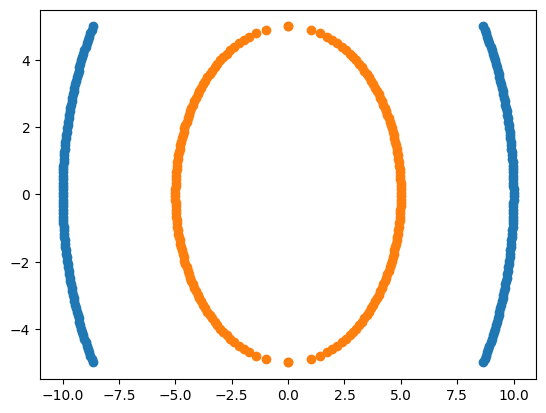

In [92]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5.0, 5.0, 100)
y = np.sqrt(10**2 - x**2)
y=np.hstack([y,-y])
x=np.hstack([x,-x])
x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(5**2 - x1**2)
y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])
plt.scatter(y,x)
plt.scatter(y1,x1)

In [93]:
import pandas as pd
df1 =pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y']=0
df2 =pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1
df = df1.append(df2)
df.head(5)

/tmp/ipykernel_103/1241201207.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2)


,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [94]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Independent and Dependent features
X = df.iloc[:, :2]  # Selecting the first two columns as features
y = df['Y']         # Target variable

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Function to train and evaluate the SVM model with different kernels
def evaluate_svm(kernel_type):
    classifier = SVC(kernel=kernel_type)  # Initialize SVM with the specified kernel
    classifier.fit(X_train, y_train)      # Train the classifier
    y_pred = classifier.predict(X_test)   # Predict on the test set
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    print(f"Accuracy with {kernel_type} kernel: {accuracy:.4f}")  # Print accuracy

# Evaluate with different kernels
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    evaluate_svm(kernel)

Accuracy with linear kernel: 0.4500
Accuracy with poly kernel: 0.5900
Accuracy with rbf kernel: 1.0000
Accuracy with sigmoid kernel: 0.5100


# K-Means

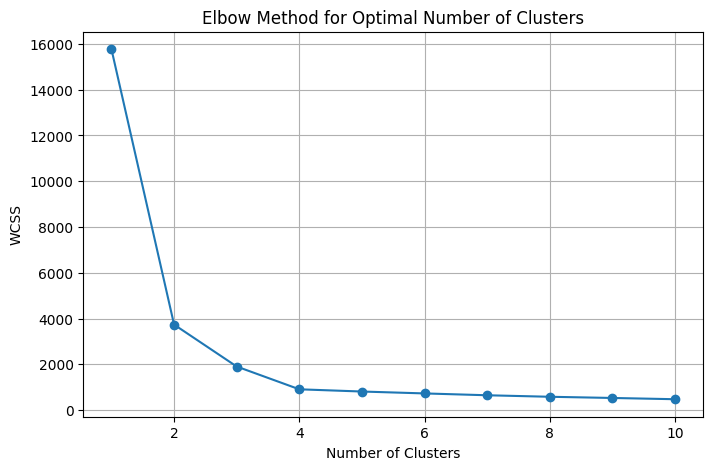

In [84]:
from sklearn.datasets import make_blobs  # Import function to create synthetic dataset
from sklearn.cluster import KMeans  # Import KMeans algorithm for clustering
import matplotlib.pyplot as plt  # Import matplotlib for plotting
import numpy as np  # Import numpy for numerical operations

# Create a synthetic dataset with 500 samples, 2 features, 4 centers, and some standard deviation in clusters
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)

# Initialize an empty list to store the WCSS values
wcss = []

# Apply K-Means clustering for each number of clusters and calculate the WCSS

# Loop over a range of cluster numbers from 1 to 10
for i in range(1, 11):
    # Initialize the K-Means algorithm with 'i' clusters
    # - n_clusters=i: Specifies the number of clusters to form and the number of centroids to generate
    # - init='k-means++': Uses the 'k-means++' method for smart initialization of centroids to speed up convergence
    # - random_state=0: Ensures reproducibility by fixing the seed for the random number generator
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    
    # Fit the K-Means model to the dataset X
    # - This step assigns each data point in X to the nearest centroid and updates the centroids to the mean of the assigned points
    kmeans.fit(X)
    
    # Append the Within-Cluster Sum of Squares (WCSS) for the current model to the 'wcss' list
    # - kmeans.inertia_: This attribute stores the WCSS, which is the sum of squared distances of samples to their closest cluster center
    wcss.append(kmeans.inertia_)


# Plot the WCSS for each number of clusters
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


**WCSS (Within-Cluster Sum of Squares):** This is a measure of how compact the clusters are; it’s the sum of squared distances between each point and the centroid of its assigned cluster.

**Elbow Method:** The plot is used to determine the optimal number of clusters by finding the "elbow point," where the WCSS starts to diminish significantly with the addition of more clusters. This point often indicates the ideal number of clusters.


### What is the Silhouette Score?

The **Silhouette Score** is a metric used to evaluate the quality of clustering in a dataset. It measures how similar a data point is to its own cluster (cohesion) compared to other clusters (separation). The silhouette score ranges from -1 to 1:
- A score close to **1** indicates that the data points are well-clustered, with clear separation between clusters.
- A score close to **0** suggests that the data points are on or very close to the decision boundary between clusters.
- A negative score (close to **-1**) means that the data points might have been assigned to the wrong cluster, as they are more similar to points in a different cluster than their own.

In summary, the silhouette score provides a measure of how well each data point fits within its assigned cluster and how distinct the clusters are from each other.


### Silhouette Score Calculation:

- **Loop over a Range of Clusters:** The loop starts from 2 clusters because the silhouette score is undefined for a single cluster.
- **K-Means Clustering:** For each value of `i` (the number of clusters), K-Means clustering is performed on the dataset.
- **Cluster Labels:** After fitting the model, the predicted cluster labels for each point are obtained using `kmeans.predict(X)`.
- **Silhouette Score:** The silhouette score is computed using `silhouette_score(X, cluster_labels)`, which assesses the clustering quality by comparing how close each point is to other points in its cluster versus points in other clusters.


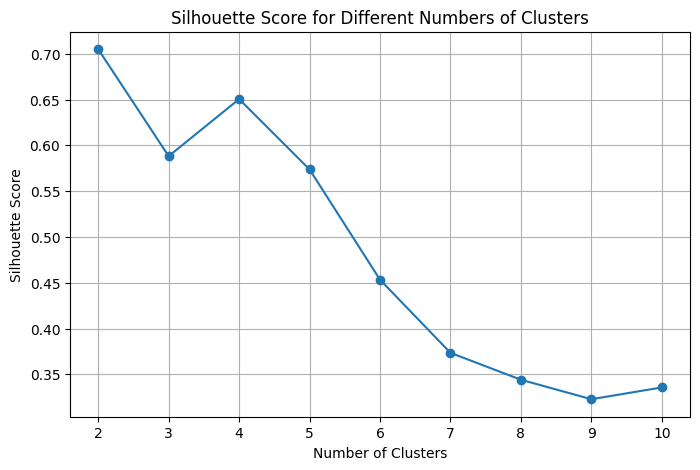

In [85]:
from sklearn.datasets import make_blobs  # Import function to create synthetic dataset
from sklearn.cluster import KMeans  # Import KMeans algorithm for clustering
from sklearn.metrics import silhouette_score  # Import silhouette_score to evaluate clustering quality
import matplotlib.pyplot as plt  # Import matplotlib for plotting
import numpy as np  # Import numpy for numerical operations

# Create a synthetic dataset with 500 samples, 2 features, 4 centers, and some standard deviation in clusters
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)

# Initialize an empty list to store the silhouette scores
silhouette_scores = []

# Apply K-Means clustering for each number of clusters and calculate the silhouette score
for i in range(2, 11):  # Silhouette score is not defined for 1 cluster, so start from 2
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    
    # Predict the cluster labels
    cluster_labels = kmeans.predict(X)
    
    # Calculate the silhouette score for the current number of clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores for each number of clusters
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


# Principal Component Analysis (PCA)

**Principal Component Analysis (PCA)** is a technique used to reduce the dimensionality of a dataset while preserving as much variance as possible. It transforms the data into a new set of variables, called *principal components*, which are orthogonal (uncorrelated) and ordered by the amount of variance they explain.

## Why Use PCA?
PCA is often used to:
- Reduce the number of features in a dataset while retaining the most important information.
- Visualize high-dimensional data in 2D or 3D.
- Remove noise from the data.



.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

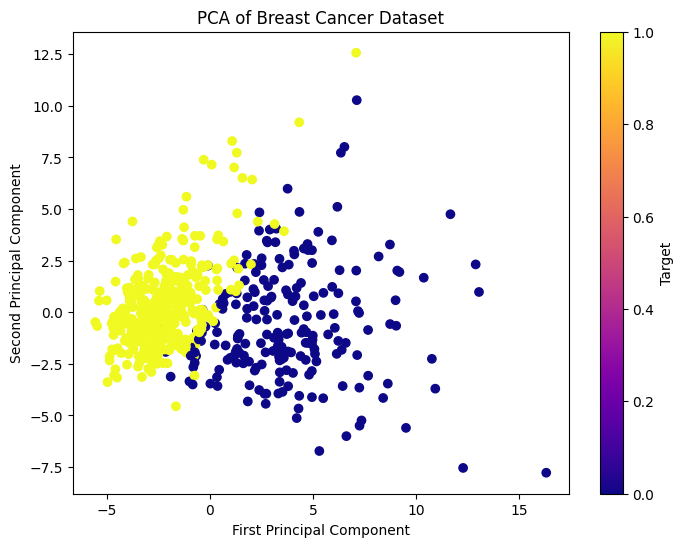

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
cancer = load_breast_cancer()

# Display dataset description
print(cancer['DESCR'])

# Create a DataFrame from the data
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
print(df.head(5))

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Perform PCA with 2 components
pca = PCA(n_components=2)
x_pca = pca.fit_transform(scaled_data)

# Print the shapes of the scaled data and PCA result
print(f"Scaled data shape: {scaled_data.shape}")
print(f"PCA transformed data shape: {x_pca.shape}")

# Plotting the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=cancer['target'], cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Breast Cancer Dataset')
plt.colorbar(label='Target')
plt.show()
